In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import my_library.gluex_style as gxs 
import os


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
os.nice(18)

18

In [3]:
colors = [10, 7, 4, 2, 0, -6, -8]

In [4]:
df_pipkmks_signal = tools.get_dataframe('pipkmks', 'fall', 'signal').Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.BEAM_RANGE)
df_pipkmks_thrown = tools.get_dataframe('pipkmks', 'fall', 'signal', filtered=False, thrown=True).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.BEAM_RANGE)

In [5]:
print(df_pipkmks_thrown.GetColumnNames())

{ "pipkmks_px", "pipkmks_py", "pipkmks_pz", "pipkmks_E", "pipkmks_m", "e_beam", "mand_t", "e_bin", "t_bin", "nParticles", "nThrown", "Beam_px", "Beam_py", "Beam_pz", "Beam_E", "Target_px", "Target_py", "Target_pz", "Target_E", "PiPlus1_px", "PiPlus1_py", "PiPlus1_pz", "PiPlus1_E", "PiPlus2_px", "PiPlus2_py", "PiPlus2_pz", "PiPlus2_E", "PiMinus_px", "PiMinus_py", "PiMinus_pz", "PiMinus_E", "KMinus_px", "KMinus_py", "KMinus_pz", "KMinus_E", "Proton_px", "Proton_py", "Proton_pz", "Proton_E", "Ks_px", "Ks_py", "Ks_pz", "Ks_E", "theta_p", "mom_p", "phi_p", "theta_km", "mom_km", "phi_km", "theta_pip1", "mom_pip1", "phi_pip1", "theta_pip2", "mom_pip2", "phi_pip2", "theta_pim", "mom_pim", "phi_pim", "theta_f1", "mom_f1", "phi_f1", "mass_f1", "mpippim", "mppip1", "mKsKm", "men_s", "men_t", "cosTheta_f1_cm", "phi_f1_cm", "cosTheta_Ks_cm", "phi_Ks_cm" }


In [17]:
hists = []
for t in range(1, 8):
    hist_signal = df_pipkmks_signal.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"pion_p_{t}", f"pion_p_{t}", 46, 0.7, 3), 'pip1_p')
    hist_thrown = df_pipkmks_thrown.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"pion_p_{t}", f"pion_p_{t}", 46, 0.7, 3), 'mom_pip1')
    # hist_signal = df_pipkmks_signal.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"kaon_p_{t}", f"kaon_p_{t}", 35, 1.5, 5), 'km_p')
    # hist_thrown = df_pipkmks_thrown.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"kaon_p_{t}", f"kaon_p_{t}", 35, 1.5, 5), 'mom_km')

    hists.append((hist_signal, hist_thrown))
df_pipkmks_signal.Count().GetValue()
df_pipkmks_thrown.Count().GetValue()

84043257

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


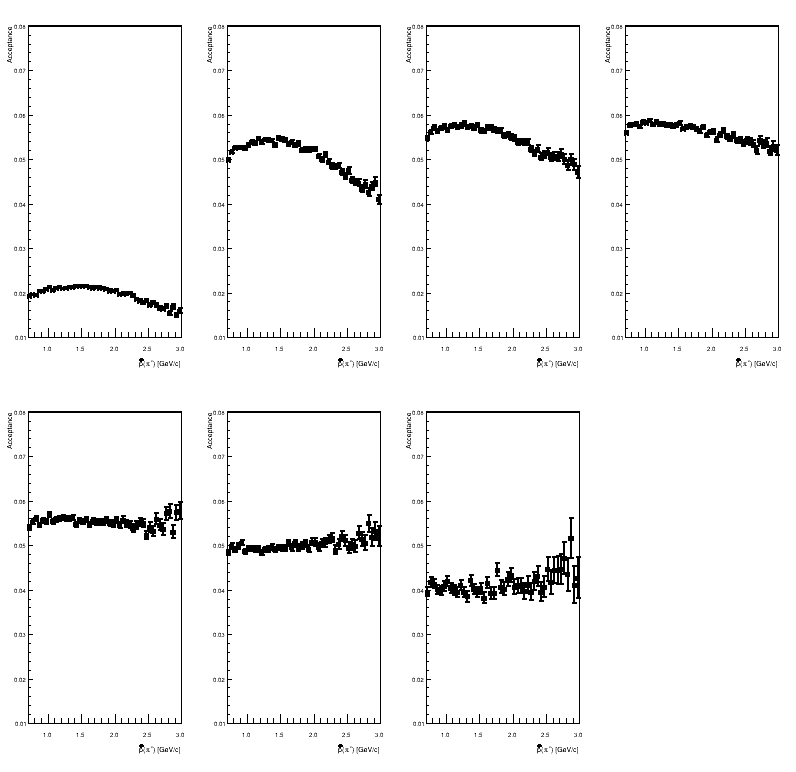

In [18]:
c = ROOT.TCanvas("c1", "c1", 800, 800)
c.Divide(4, 2)

acceptances = []
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist[0].GetPtr().Sumw2()
    hist[1].GetPtr().Sumw2()
    acceptance = hist[0].GetPtr().Clone(f'acceptance_{i+1}')
    acceptance.Divide(hist[1].GetPtr())
    acceptance.GetYaxis().SetRangeUser(0.01, 0.08)
    acceptance.GetYaxis().SetTitle("Acceptance")
    acceptance.GetYaxis().SetTitleOffset(1.5)
    acceptance.GetXaxis().SetTitle("#vec{p}(#pi^{#mp}) [GeV/c]")
    # acceptance.GetXaxis().SetTitle("#vec{p}(K^{#pm}) [GeV/c]")

    acceptances.append(acceptance)
    acceptances[i].Draw("E1")

c.Draw()

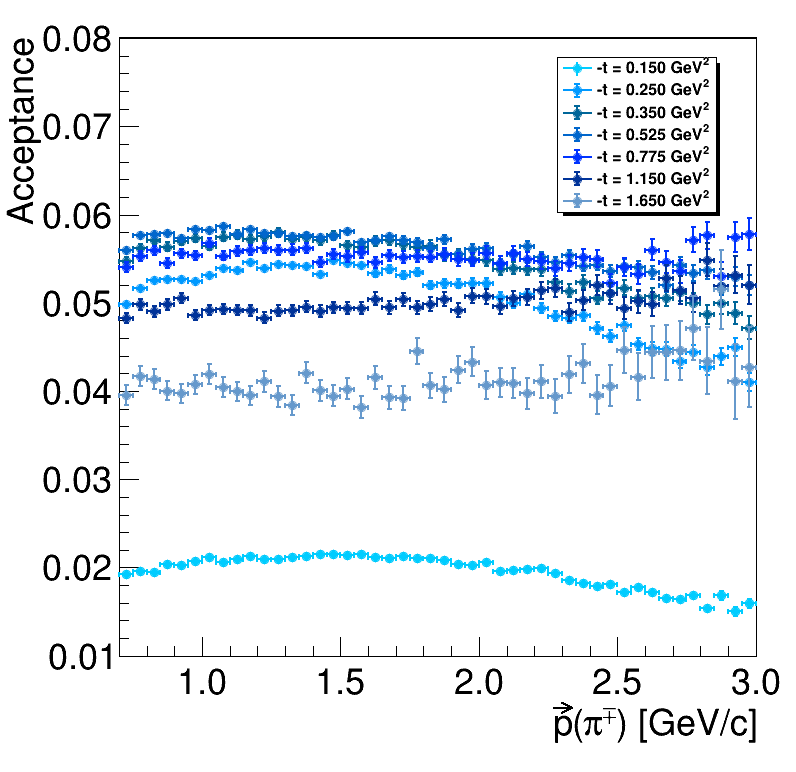

In [19]:
legend = ROOT.TLegend(0.7, 0.725, 0.9, 0.925)
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.15)
acceptances[0].Draw()
acceptances[0].GetXaxis().SetTitleSize(0.05)
acceptances[0].GetXaxis().SetTitleOffset(1.1)
acceptances[0].GetXaxis().SetLabelSize(0.05)
acceptances[0].GetYaxis().SetTitleSize(0.05)
acceptances[0].GetYaxis().SetTitleOffset(1.5)
acceptances[0].GetYaxis().SetLabelSize(0.05)
for i, acc in enumerate(acceptances):
    t_middle = constants.T_CUT_DICT[i+1][0] + constants.T_WIDTH_DICT[i+1]/2
    acc.SetLineColor(ROOT.kAzure + colors[i])
    acc.SetMarkerStyle(20)
    acc.SetMarkerColor(ROOT.kAzure + colors[i])
    legend.AddEntry(acc, f"-t = {t_middle:0.3f}" + " GeV^{2}", "lep")
    acc.Draw("E1 SAME")
legend.Draw()
c.Draw()